In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, scale, PolynomialFeatures, OneHotEncoder, PowerTransformer, MinMaxScaler, RobustScaler

In [102]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


True

In [3]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("Womens_Clothing_E-Commerce_Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
len(df)

23486

In [6]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
df.shape

(23486, 11)

In [11]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [13]:
df.corr(numeric_only=True)

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Unnamed: 0,1.000000,-0.006072,-0.007749,-0.002568,-0.003887,-0.002907
Clothing ID,-0.006072,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,-0.007749,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.002568,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended IND,-0.003887,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,-0.002907,0.046356,0.043079,-0.064961,-0.069045,1.000000


<Axes: >

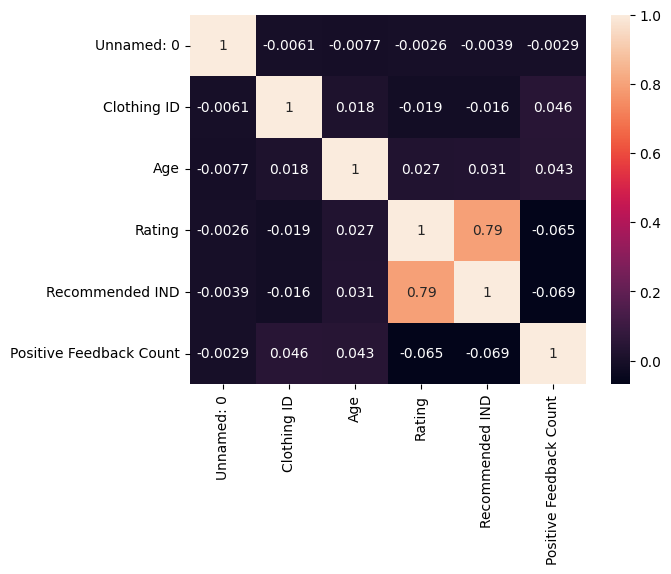

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Data Wrangling

In [20]:
def first_look(col):
    print("Column name: ", col)
    print("---------------------")
    print("percentage_of_null: ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("Number of nulls: ", df[col].isnull().sum())
    print("Number of Unique", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [21]:
first_look("Title")

Column name:  Title
---------------------
percentage_of_null:  % 16.22
Number of nulls:  3810
Number of Unique 13993
Title
NaN                                        3810
Love it!                                    136
Beautiful                                    95
Love                                         88
Love!                                        84
                                           ... 
Not for my body                               1
Perfect transition dress                      1
The perfect spring dress!                     1
Super soft but can make you look frumpy       1
Please make more like this one!               1
Name: count, Length: 13994, dtype: int64


In [22]:
def duplicate_values(df):
    print("=======Duplicate Check=======")
    duplicate_values = df.duplicated(keep="first", subset=None).sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep="first", inplace=True)
        print("Duplicated were dropped")
    else:
        print("There are no duplicates")

In [23]:
duplicate_values(df)

=======Duplicate Check=======
There are no duplicates


In [24]:
df.duplicated().sum()

0

In [45]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = True)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys = ["missing_number", "missing_percent"])
    return missing_values[missing_values['missing_number']>0]

In [46]:
missing_values(df)

,missing_number,missing_percent
Division Name,14,0.000596
Department Name,14,0.000596
Class Name,14,0.000596
Review Text,845,0.035979
Title,3810,0.162224


In [26]:
df.isnull().sum().sort_values()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
Review Text                 845
Title                      3810
dtype: int64

In [34]:
df.isnull().sum()/df.isnull().count()

Unnamed: 0                 0.000000
Clothing ID                0.000000
Age                        0.000000
Title                      0.162224
Review Text                0.035979
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.000596
Department Name            0.000596
Class Name                 0.000596
dtype: float64

In [35]:
df.isnull().count()

Unnamed: 0                 23486
Clothing ID                23486
Age                        23486
Title                      23486
Review Text                23486
Rating                     23486
Recommended IND            23486
Positive Feedback Count    23486
Division Name              23486
Department Name            23486
Class Name                 23486
dtype: int64

In [36]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [40]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [54]:
def drop_columns(df, drop_columns):
    if drop_columns != []:
        df.drop(drop_columns, axis = 1, inplace=True)
        print(drop_columns, "were dropped")
    else:
        print("No columns provided")

def drop_null(df, limit):
    print("Shape", df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0] * 100) > limit:
            print(df.isnull().sum()[i], "percent of ", i, "nulls were dropped")
            df.drop(i, axis = 1, inplace = True)
            print("New Shape", df.shape)
    print('New shape after missing value control:', df.shape)

In [55]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [56]:
df.rename(columns = {"Review Text" : "text", "Recommended IND" : "label"}, inplace = True)

In [57]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [68]:
df_ml = df

In [70]:
type(df_ml)

pandas.core.frame.DataFrame

In [71]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22641 non-null  object
 1   label   23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [79]:
number_of_nulls_text = df_ml['text'].isnull().sum()
print(number_of_nulls_text)
percentage_of_nulls_text = number_of_nulls_text/df_ml.shape[0]  *100
print(percentage_of_nulls_text)

845
3.5978881035510515


In [80]:
number_of_nulls_label = df_ml['label'].isnull().sum()
print(number_of_nulls_label)
percentage_of_nulls_label = number_of_nulls_label/df_ml.shape[0]  *100
print(percentage_of_nulls_label)

0
0.0


In [81]:
missing_values(df_ml)

,missing_number,missing_percent
text,845,0.035979


In [87]:
df_ml.isnull().melt(value_name="missing")

,variable,missing
0,text,False
1,text,False
2,text,False
3,text,False
4,text,False
...,...,...
46967,label,False
46968,label,False
46969,label,False
46970,label,False


<Axes: >

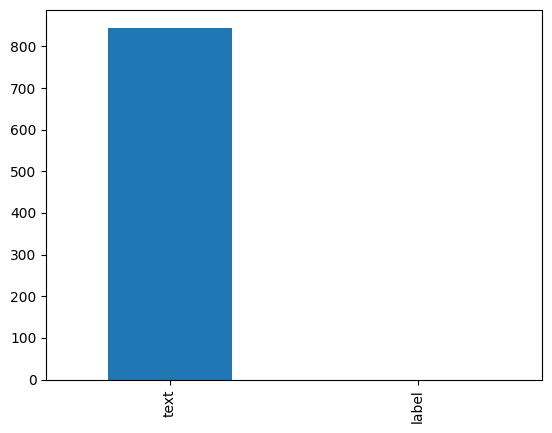

In [89]:
df.isnull().sum().plot(kind = 'bar')

In [90]:
df_ml.dropna(inplace=True)
df_ml.reset_index(drop=True, inplace=True)
df_ml

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
22636,I was very happy to snag this dress at such a ...,1
22637,"It reminds me of maternity clothes. soft, stre...",1
22638,"This fit well, but the top was very see throug...",0
22639,I bought this dress for a wedding i have this ...,1


In [91]:
df_ml.to_csv('new_file.csv', index=False)

Text Mining

Tokenization, Noise Removal, Lexicon Normalization

In [93]:
print(word_tokenize("Udit is great"))

['Udit', 'is', 'great']


In [99]:
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)

{'y', "it'd", 'few', 'yours', 'doesn', 'wasn', "mustn't", 'be', 'after', 'own', 'up', 'but', 'shouldn', 'were', 'ours', 'being', 'himself', 'couldn', 'this', 'not', "i'm", 'she', 'mightn', 'through', 'you', 'hadn', 'above', "hadn't", 'haven', 'themselves', 'how', 'during', "hasn't", 'mustn', 'nor', 's', 'as', 'if', "shouldn't", "we've", 'off', "i've", 'our', "wouldn't", 'an', "you'd", 'no', 'is', 'out', 'other', 'did', 'theirs', "we'll", 'been', 'just', 'o', 'these', 'd', 'than', "you're", 'under', 'his', "that'll", "don't", 'should', "they'd", "it'll", 'down', "they'll", "they're", "isn't", 'the', 'against', 're', "we're", 'those', "she'd", 'or', 'was', "wasn't", 'at', 'what', 'me', 'all', "needn't", 'now', 'and', 'am', 'only', 'further', 'we', 'whom', 'by', 'can', "aren't", 'same', 'will', 'won', 'into', 'them', 'again', 'my', 'him', 'some', 'of', 'll', "should've", 'isn', 'where', 'yourselves', 'didn', 'for', 'myself', 'ma', "i'll", "she'll", 'then', 'here', 'ain', 've', 'he', 'itse

In [100]:
def cleaning(data):
    text_tokens = word_tokenize(data.replace("'", "").lower())

    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    tokens_without_stopwords = [w for w in tokens_without_punc if w not in STOPWORDS]

    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_stopwords]

    return " ".join(text_cleaned)

In [103]:
cleaning("Hey this is Udit and he is running")

'hey udit running'

In [106]:
WordNetLemmatizer().lemmatize("Running swimming keeping") 

'Running swimming keeping'

Sample script

In [107]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
words = word_tokenize("Running swimming playing")
print(words)

['Running', 'swimming', 'playing']


In [114]:
lemmatized_words = [lemmatizer.lemmatize(word.lower(), pos='v') for word in words]

In [115]:
lemmatized_words

['run', 'swim', 'play']

In [117]:
df_ml['text'].iloc[0]

'Absolutely wonderful - silky and sexy and comfortable'

### WordCloud

In [118]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


True

In [119]:
positive_sentences = df_ml[df_ml['label'] == 1]

In [121]:
negative_sentences = df_ml[df_ml['label'] == 0]

In [124]:
negative_sentences.head()

,text,label
2,I had such high hopes for this dress and reall...,0
5,"I love tracy reese dresses, but this one is no...",0
10,Dress runs small esp where the zipper area run...,0
22,"First of all, this is not pullover styling. th...",0
25,"Loved the material, but i didnt really look at...",0


In [126]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in STOPWORDS]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [128]:
positive_sentences = positive_sentences['text'].apply(cleaning)

In [130]:
print(positive_sentences.head())

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
6    aded basket hte last mintue see would look lik...
Name: text, dtype: object


In [131]:
negative_sentences = negative_sentences['text'].apply(cleaning)

In [136]:
positive_words = " ".join(positive_sentences)

In [145]:
print(positive_words[0:100])

absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne


In [140]:
print(len(positive_words))

3308287


In [141]:
negative_words = " ".join(negative_sentences)

In [143]:
print(negative_words)

high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needless say going back first pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sadly returning im sure find something exchange l